In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
boston['filename']

'/Users/ranvir/Documents/rgithub/datascience/venv/lib/python3.7/site-packages/sklearn/datasets/data/boston_house_prices.csv'

In [8]:
boston_df = pd.read_csv(boston['filename'])

In [9]:
boston_df.head()

,506,13,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [10]:
boston_df['Unnamed: 0'] = boston_df['506']
boston_df['Unnamed: 1'] = boston_df['13']
boston_df.drop('506', axis=1, inplace=True)
boston_df.drop('13', axis=1, inplace=True)

In [11]:
# Cleaning the data.
index = 0
for a in boston_df.loc[0]:
    try:
        if (index == 12 or index == 13):
            boston_df[a] = boston_df['Unnamed: ' + str(index - 12)]
            boston_df.drop('Unnamed: ' + str(index - 12), axis=1, inplace=True)
        else:
            boston_df[a] = boston_df['Unnamed: ' + str(index + 2)]
            boston_df.drop('Unnamed: ' + str(index + 2), axis=1, inplace=True)
        index = index + 1
    except KeyError:
        break

In [12]:
boston_df.drop(0, axis=0, inplace=True)

In [13]:
boston_df.head()

,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM,ZN
1,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24,0.00632,18
2,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6,0.02731,0
3,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.02729,0
4,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.03237,0
5,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2,0.06905,0


In [14]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   INDUS    506 non-null    object
 1   CHAS     506 non-null    object
 2   NOX      506 non-null    object
 3   RM       506 non-null    object
 4   AGE      506 non-null    object
 5   DIS      506 non-null    object
 6   RAD      506 non-null    object
 7   TAX      506 non-null    object
 8   PTRATIO  506 non-null    object
 9   B        506 non-null    object
 10  LSTAT    506 non-null    object
 11  MEDV     506 non-null    object
 12  CRIM     506 non-null    object
 13  ZN       506 non-null    object
dtypes: object(14)
memory usage: 59.3+ KB


In [15]:
boston_df.describe()

,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM,ZN
count,506,506,506,506,506,506,506,506,506,506,506,506,506,506
unique,76,2,81,446,356,412,9,66,46,357,455,229,504,26
top,18.1,0,0.538,6.417,100,3.4952,24,666,20.2,396.9,6.36,50,14.3337,0
freq,132,471,23,3,43,5,132,132,140,121,3,16,2,372


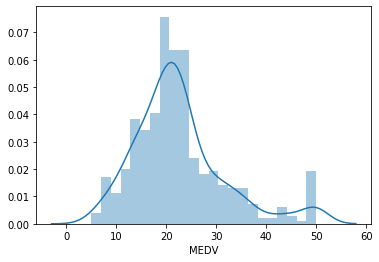

In [16]:
sns.distplot(boston_df['MEDV'])

In [17]:
boston_df.columns

Index(['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'B', 'LSTAT', 'MEDV', 'CRIM', 'ZN'],
      dtype='object')

In [20]:
boston_df['target'] = boston['target']

In [21]:
boston_df.head()

,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM,ZN,target
1,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24,0.00632,18,24.0
2,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6,0.02731,0,21.6
3,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.02729,0,34.7
4,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.03237,0,33.4
5,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2,0.06905,0,36.2


In [22]:
X = boston_df[['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'B', 'LSTAT', 'CRIM', 'ZN', 'MEDV']]

In [23]:
y = boston_df['target']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=30, random_state=101)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [476, 30]